# L-gulonate degradation pathway

##Import libraries

In [1]:
%pylab inline

import sys
sys.path.append('/trombone1/home/scalhoun/bin/repo')

from analyze_test import pathens
import numpy as np
from IPython.display import HTML

Populating the interactive namespace from numpy and matplotlib


##Define file locations and input enzymes
Also, defining validated pathway for comparison

In [2]:
picklefile = './output/gul_2sd.pickle'
datafile = './data/gulonate.h5'
enzs = ['0', '1', '2', '3', '4', '5']
ligands = ['ZINC03869787',
           'ZINC04095492',
           'ZINC02040884',
           'ZINC01532568',
           'ZINC01529165',
           'ZINC03869936']

##Load the pathway models from the output pickle file and data

In [3]:
pE = pathens(datafile=datafile)
pE.set_all_enzymes(enzs)
pE.set_true_enzymes(enzs)
pE.set_true_ligands(ligands)
pE.set_true_path(startposition=1)
pE.load_data_from_analysis_pickle(picklefile)
pE.make_position_matrices(startposition=1)
print 'Number of unique paths: %d' % len(pE.uniqpathstrs)
print 'Number of clusters: %d' % np.max(pE.flatclusters)

Number of unique paths: 154
Number of clusters: 12


##Rank of the validated pathway

In [11]:
score = pE.np_path_array['obj'][pE.np_path_array['strrepr'] == pE.true_path]
print 'Rank of hypothesized path: %d' % (np.sum(pE.np_path_array['obj'] > score) + 1)
HTML(pathstring_to_table(pE.true_path))

Rank of hypothesized path: 1


0,,1,,2,,3,,4,,5,


##Entropy by position

In [7]:
pE.evaluate_accuracy_precision()

Mean Entropy: 1.212
Mean Interaction Weight: 0.006
Mean Ranks over Position: 1.083
  Components appearing at position: 12.0


##Rank of substrate and product to their corresponding enzyme

In [8]:
HTML(pE.ligand_rankings_html(startposition=1))

Enzyme,Substrate rank from individual docking run,Product rank from individual docking run,Substrate rank by integrated approach,Product rank by integrated approach,Interaction rank by integrated approach
1,1752,1114,1,1,1
2,2976,3378,1,1,2
3,387,55,1,1,1
4,1187,3540,1,1,1
5,33,7,1,1,2


##Frequency of enzymes occurring in pathway model ensemble at every position

In [9]:
HTML(pE.enzyme_pos_html())

,0,1,2,3,4,5
1,100.0,0.0,0.0,0.0,0.0,0.0
2,0.0,61.0,1.9,37.0,0.0,0.0
3,0.0,2.6,70.1,0.0,16.9,10.4
4,0.0,0.0,11.7,61.7,13.6,13.0
5,0.0,0.0,16.2,1.3,64.9,17.5
6,0.0,36.4,0.0,0.0,4.5,59.1


##Accuracy by position

In [10]:
HTML(pE.get_html_table(percent_cutoff=.05, enz_percent_cutoff=0.15, urlstring_to_image='http://zinc.docking.org/img/sub/%s.gif'))

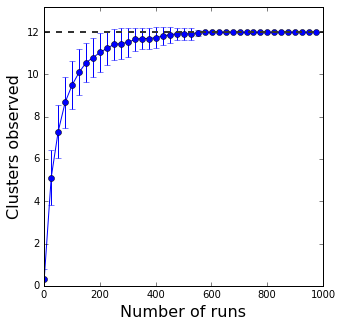

In [12]:
pE.plot_convergence_by_runs(run_increment=25)

In [13]:
from collections import Counter
dtype = [('cluster', int), ('count', int), ('bestscore', np.float32)]
x = Counter(pE.flatclusters)
scs = []
for clnum in x.keys():
    clusterarray = pE.np_path_array[pE.flatclusters==clnum]
    scs.append(clusterarray['obj'].max())
a = np.array(zip(x.keys(), x.values(), scs), dtype=dtype)
aso = np.sort(a, order='bestscore')

htmlpathtables ='<table>%s' % pathstring_to_table(pE.true_path, title='Hypothesized')
for clnum in aso['cluster'][::-1]:
    clusterarray = pE.np_path_array[pE.flatclusters==clnum]
    idx = clusterarray['obj'].argmax()
    score = clusterarray['obj'].max()
    title = '%d\tScore=%.2f\t(N=%d)' % (clnum, score, len(clusterarray))
    htmlpathtables += pathstring_to_table(clusterarray['strrepr'][idx], title=title)
    print clusterarray['strrepr'][idx]
htmlpathtables += '</table>'
HTML(htmlpathtables)

0 -> ZINC03869787 -> 1 -> ZINC04095492 -> 2 -> ZINC02040884 -> 3 -> ZINC01532568 -> 4 -> ZINC01529165 -> 5 -> ZINC03869936
0 -> ZINC02040884 -> 3 -> ZINC01532568 -> 5 -> ZINC00895313 -> 2 -> ZINC00895048 -> 4 -> ZINC03830895 -> 1 -> ZINC03869936
0 -> ZINC03869787 -> 1 -> ZINC04095492 -> 2 -> ZINC02040884 -> 3 -> ZINC01532568 -> 5 -> ZINC00895313 -> 4 -> ZINC03869936
0 -> ZINC02040884 -> 3 -> ZINC01532568 -> 4 -> ZINC01529165 -> 5 -> ZINC24492326 -> 2 -> ZINC05410049 -> 1 -> ZINC03869936
0 -> ZINC02040884 -> 3 -> ZINC01532568 -> 4 -> ZINC01529165 -> 5 -> ZINC30724348 -> 2 -> ZINC00895264 -> 1 -> ZINC01532521
0 -> ZINC02040884 -> 3 -> ZINC01532568 -> 2 -> ZINC01529927 -> 4 -> ZINC01529644 -> 5 -> ZINC05410049 -> 1 -> ZINC03869936
0 -> ZINC02040884 -> 3 -> ZINC01532568 -> 5 -> ZINC00901286 -> 4 -> ZINC24492326 -> 2 -> ZINC05410049 -> 1 -> ZINC03869936
0 -> ZINC02040884 -> 3 -> ZINC01532568 -> 4 -> ZINC03581111 -> 2 -> ZINC01529644 -> 5 -> ZINC05410049 -> 1 -> ZINC03869936
0 -> ZINC0386978

Hypothesized,0,,1,,2,,3,,4,,5,
11 Score=53.17 (N=88),0,,1,,2,,3,,4,,5,
7 Score=52.75 (N=9),0,,3,,5,,2,,4,,1,
12 Score=52.65 (N=7),0,,1,,2,,3,,5,,4,
5 Score=51.30 (N=12),0,,3,,4,,5,,2,,1,
3 Score=51.26 (N=8),0,,3,,4,,5,,2,,1,
2 Score=51.17 (N=16),0,,3,,2,,4,,5,,1,
6 Score=51.10 (N=5),0,,3,,5,,4,,2,,1,
4 Score=50.72 (N=3),0,,3,,4,,2,,5,,1,
10 Score=50.72 (N=2),0,,1,,4,,2,,3,,5,
9 Score=50.70 (N=1),0,,3,,1,,2,,4,,5,
